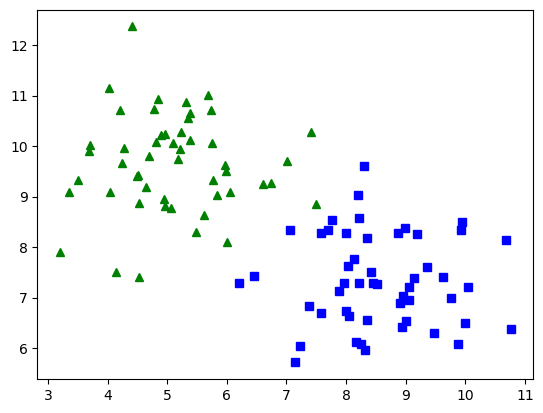

In [120]:
#Paper
#https://www.ling.upenn.edu/courses/cogs501/Rosenblatt1958.pdf

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

# Generate linearly seperable data
X, y = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 10))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()

In [121]:
data_matrix = [[1, *x, y] for x, y in zip(X, y)]
weight_vector = [0.5, 0.5, 0.5]  # Arbitrarily randomized

def predict(vector):
    summation = 0
    activation = 0
    
    for i in range(len(weight_vector)):
        summation += weight_vector[i] * vector[i]
        
    if summation >= activation:
        return 1 
    else:
        return 0


def accuracy():
    total_correct = 0
    
    for i in data_matrix:
        if predict(i) == i[-1]:
            total_correct += 1
        
    return total_correct / float(len(data_matrix))


def train():
    learning_rate = 0.5
    epochs = 10
    for epoch in range(epochs):
        current_acc = accuracy()
        
        print("Epoch: ", epoch, " ", "Accuracy: ", current_acc)
        print("Final weight matrix: ", weight_vector)
        
        if current_acc == 1:
            print("Final weight matrix: ", weight_vector)
            break
            
        for i in data_matrix:
            error = i[-1] - predict(i)
            for j in range(len(weight_vector)):
                weight_vector[j] += error * learning_rate * i[j]
                
    
    print("\n\nFinal weight matrix: ", weight_vector)
    print("\n")
    print("Final Accuracy: ", current_acc)
    return weight_vector
            
        

In [122]:
train()

Epoch:  0   Accuracy:  0.5
Final weight matrix:  [0.5, 0.5, 0.5]
Epoch:  1   Accuracy:  0.84
Final weight matrix:  [0.5, 17.3295305604007, -9.850936357133689]
Epoch:  2   Accuracy:  0.94
Final weight matrix:  [0.0, 17.544322705299336, -16.07249018467423]
Epoch:  3   Accuracy:  0.99
Final weight matrix:  [0.0, 20.94000094615398, -17.134921593299556]
Epoch:  4   Accuracy:  0.96
Final weight matrix:  [0.0, 22.041312987784934, -19.15017768747503]
Epoch:  5   Accuracy:  0.99
Final weight matrix:  [0.0, 24.207288100651986, -19.376142852603696]
Epoch:  6   Accuracy:  0.99
Final weight matrix:  [0.0, 24.402569495147958, -20.241066711048493]
Epoch:  7   Accuracy:  0.96
Final weight matrix:  [0.0, 25.503881536778913, -22.256322805223967]
Epoch:  8   Accuracy:  0.99
Final weight matrix:  [0.0, 26.294671225425354, -22.243556140051176]
Epoch:  9   Accuracy:  1.0
Final weight matrix:  [0.0, 27.280742308567767, -23.095713333323182]
Final weight matrix:  [0.0, 27.280742308567767, -23.095713333323182]


[0.0, 27.280742308567767, -23.095713333323182]

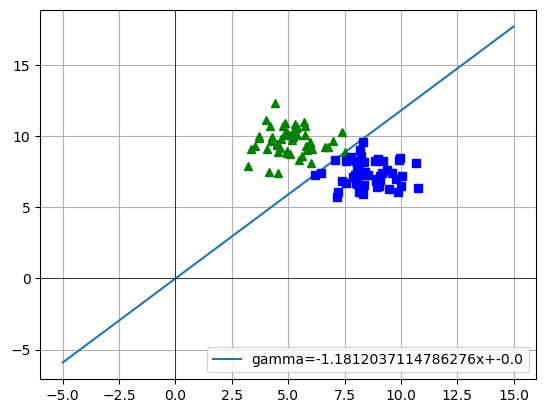

In [124]:
# Convert learned weight vector component into a linear equation
m = weight_vector[1] / weight_vector[2]
b = weight_vector[0] / weight_vector[2]

x = np.linspace(-5, 15, 200)  # from -5 to 5 with 100 points

# already used y for dataset
gamma = -1 * (m * x + b)

# Plot dat shi
plt.plot(x, gamma, label=f'gamma={m}x+{b}')
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()